# <center>Data Science and Business Analytics
## <center>Task-7 : Stock Market Prediction using Numerical and Textual Analysis
### Name : Selvan Kumar M

## Getting Data

In [ ]:
import pandas_datareader as pdr

In [ ]:
import os

df=pdr.get_data_yahoo('ibm',start='2017-01-1',end='2020-12-15')

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,139.613220
2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,141.341766
2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,140.874130
2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,141.567230
2017-01-09,169.800003,167.619995,169.470001,167.649994,3189900.0,139.997330


In [ ]:
# Downloding data
df.to_csv('ibm.csv')

## Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

In [ ]:
data = pd.read_csv('ibm.csv')

In [ ]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,139.613220
1,2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,141.341766
2,2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,140.874130
3,2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,141.567230
4,2017-01-09,169.800003,167.619995,169.470001,167.649994,3189900.0,139.997330


In [ ]:
data1=data.reset_index()['Close']

In [ ]:
data1

0      167.190002
1      169.259995
2      168.699997
3      169.529999
4      167.649994
          ...    
991    126.790001
992    124.959999
993    124.269997
994    123.529999
995    125.930000
Name: Close, Length: 996, dtype: float64

## Visuvalization

In [ ]:
from matplotlib import style
plt.style.use(['dark_background'])

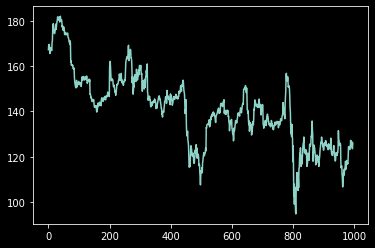

In [ ]:
plt.plot(data1);

In [ ]:
data1

0      167.190002
1      169.259995
2      168.699997
3      169.529999
4      167.649994
          ...    
991    126.790001
992    124.959999
993    124.269997
994    123.529999
995    125.930000
Name: Close, Length: 996, dtype: float64

## Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
print(data1)

[[0.83069518]
 [0.85443906]
 [0.8480156 ]
 [0.85753615]
 [0.83597152]
 [0.81153943]
 [0.83711864]
 [0.83941271]
 [0.83241569]
 [0.83872451]
 [0.82622168]
 [0.82633632]
 [0.86923613]
 [0.87474193]
 [0.93060331]
 [0.95801785]
 [0.96226206]
 [0.94666215]
 [0.92945637]
 [0.91477412]
 [0.91213577]
 [0.91546232]
 [0.92968583]
 [0.93014457]
 [0.95996799]
 [0.9337004 ]
 [0.94562984]
 [0.96249135]
 [0.97029139]
 [0.97912374]
 [0.99690291]
 [0.99403528]
 [0.98531775]
 [0.98061479]
 [0.99082355]
 [0.99655881]
 [0.99311779]
 [0.97075014]
 [0.97556791]
 [1.        ]
 [0.98371188]
 [0.97820608]
 [0.98302368]
 [0.98199137]
 [0.9713237 ]
 [0.94528557]
 [0.95274151]
 [0.93702695]
 [0.9285387 ]
 [0.92957101]
 [0.94597395]
 [0.92773568]
 [0.92830925]
 [0.90743299]
 [0.91775639]
 [0.91821531]
 [0.90685943]
 [0.90617122]
 [0.9146593 ]
 [0.90812119]
 [0.90720353]
 [0.91041526]
 [0.91454466]
 [0.91477412]
 [0.89596247]
 [0.89103005]
 [0.88747422]
 [0.8766919 ]
 [0.86958024]
 [0.8704979 ]
 [0.85753615]
 [0.87

In [ ]:
train_size=int(len(data1)*0.65)
test_size=len(data1)-train_size
print('Train Size:', train_size)
print('Test Size:',test_size)

Train Size: 647
Test Size: 349


In [ ]:
s=len(data1)
s

996

## Train Test Split

In [ ]:
train_data,test_data=data1[0:train_size,:],data1[train_size:len(data1),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [ ]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [ ]:
print(x_train)

[[0.83069518 0.85443906 0.8480156  ... 0.65680204 0.66230784 0.67022253]
 [0.85443906 0.8480156  0.85753615 ... 0.66230784 0.67022253 0.66207856]
 [0.8480156  0.85753615 0.83597152 ... 0.67022253 0.66207856 0.65336085]
 ...
 [0.50080289 0.49449424 0.48417067 ... 0.63053463 0.63787575 0.633861  ]
 [0.49449424 0.48417067 0.46558848 ... 0.63787575 0.633861   0.63799039]
 [0.48417067 0.46558848 0.46249139 ... 0.633861   0.63799039 0.64911681]]


In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# Tensor Flow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 7s 354ms/step - loss: 0.2359 - val_loss: 0.0640
Epoch 2/100
9/9 [==============================] - 2s 193ms/step - loss: 0.0247 - val_loss: 0.0098
Epoch 3/100
9/9 [==============================] - 2s 196ms/step - loss: 0.0119 - val_loss: 0.0296
Epoch 4/100
9/9 [==============================] - 2s 190ms/step - loss: 0.0078 - val_loss: 0.0127
Epoch 5/100
9/9 [==============================] - 2s 190ms/step - loss: 0.0063 - val_loss: 0.0202
Epoch 6/100
9/9 [==============================] - 2s 191ms/step - loss: 0.0051 - val_loss: 0.0134
Epoch 7/100
9/9 [==============================] - 2s 191ms/step - loss: 0.0054 - val_loss: 0.0170
Epoch 8/100
9/9 [==============================] - 2s 182ms/step - loss: 0.0048 - val_loss: 0.0121
Epoch 9/100
9/9 [==============================] - 2s 184ms/step - loss: 0.0042 - val_loss: 0.0144
Epoch 10/100
9/9 [==============================] - 2s 182ms/step - loss: 0.0047 - val_loss: 0.0111
Epoch 11/

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Evaluate Metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.86904849312512

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

124.78895600461155

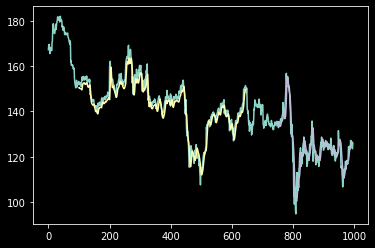

In [ ]:
#split train predict for plot
look_back=100
trainpredictplot=np.empty_like(data1)
trainpredictplot[:, :]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shif test predict for plot
testpredictplot=np.empty_like(data1)
testpredictplot[:, :]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(data1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(data1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [ ]:
len(test_data)

349

In [ ]:
x_input=test_data[248:].reshape(1,-1)
x_input.shape

(1, 101)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

## Testing

In [ ]:
from numpy import array
lst_output=[]
n_steps= 100
i=0
while(i<30):
  if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
  else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.3606332  0.34067452 0.35042444 0.3226658  0.32312464 0.33883919
 0.35638908 0.35191558 0.35960089 0.34629505 0.37095669 0.36682729
 0.36625373 0.34709798 0.34985088 0.34033042 0.34583622 0.33344803
 0.32553343 0.32564816 0.35455384 0.34262449 0.33723333 0.34273922
 0.34755681 0.32736867 0.32840106 0.38323005 0.34044506 0.31578351
 0.3032806  0.31532468 0.29582474 0.30614823 0.31337462 0.31738937
 0.33780689 0.34583622 0.32105994 0.29226891 0.29525127 0.27598079
 0.26749254 0.27735719 0.30924532 0.30018359 0.30855702 0.3019041
 0.29593947 0.31245705 0.31199822 0.33608629 0.42119762 0.37875664
 0.37210372 0.34790091 0.3575362  0.34549212 0.35742147 0.35271851
 0.25923384 0.23273688 0.24076629 0.24351919 0.20016064 0.18111953
 0.13626984 0.16219324 0.19373718 0.20807533 0.22241348 0.19649008
 0.22941041 0.22103698 0.23812803 0.26542793 0.25728378 0.22631341
 0.25326912 0.27058963 0.26301904 0.25235146 0.25705441 0.25430151
 0.29043358 0.34010096 0.33757743 0.33929802 0.3297

## Prediction for 100 days

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(data1)

996

## Visualizing Prediction

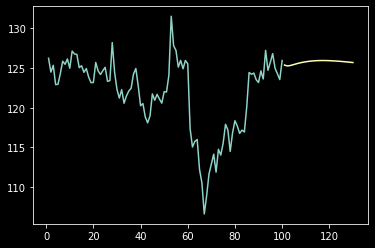

In [ ]:
plt.plot(day_new,scaler.inverse_transform(data1[896:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

## Prediction

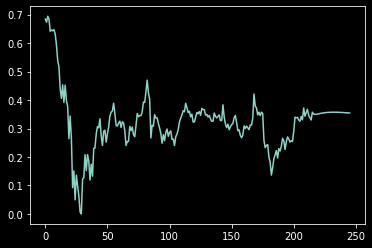

In [ ]:
df3=data1.tolist()
df3.extend(lst_output)
plt.plot(df3[780:]);

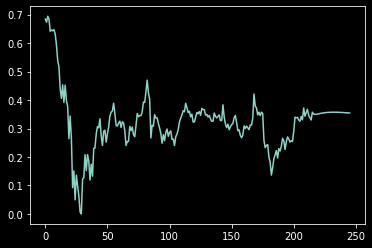

In [ ]:
 df3=data1.tolist()
df3.extend(lst_output)
plt.plot(df3[780:]);

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

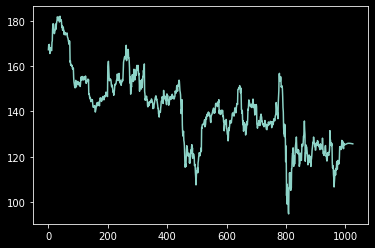

In [ ]:
plt.plot(df3)

## Steps are involved in Stock Sentiment Analysis

### Packages

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Importing Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data/news.csv', encoding = "ISO-8859-1")

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

In [ ]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

# Preprocessing steps are involved in this task


In [ ]:
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,Hammers hand Robson a youthful lesson,Saints party like it s,Wear wolves have turned into lambs,Stump mike catches testy Gough s taunt,Langer escapes to hit,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,A tale of two tails,I say what I like and I like what I say,Elbows Eyes and Nipples,Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United England,Women in record South Pole walk,Vasco da Gama Brazil,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,Our choice not theirs,Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,Met faces fresh attack on race crime,Everton fans top racist league of shame,Our breasts ourselves,Russia s new boss has an extremely strange his...,Always and forever,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jai

## Converting the headlines into lower case

In [ ]:
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,hammers hand robson a youthful lesson,saints party like it s,wear wolves have turned into lambs,stump mike catches testy gough s taunt,langer escapes to hit,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


## Convert all data in single paragraph

In [ ]:
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [ ]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [ ]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

## Apply CountVectorizer and Randomforest classifier


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

## Apply Bag of words

In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

## Apply RandomForest Classifier

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

In [ ]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

## Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Confusion Matrix

In [ ]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)

[[137  49]
 [  7 185]]


## Accuracy Score

In [ ]:
score=accuracy_score(test['Label'],predictions)
print(score*100)

85.18518518518519


## Classification report

In [ ]:
report=classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       186
           1       0.79      0.96      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378

